In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_44.csv", skiprows=4)
df.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.074429,7.214915,7.244843,7.459106,7.974302,8.407412,7.869470,7.676548,7.571697,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,10.116000,11.184000,11.192000,11.187000,11.710000,12.006000,14.100000,14.008000,13.687000,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.167580,4.283996,4.334377,4.390764,4.795318,4.666634,3.593354,3.200801,3.172421,NaN
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.572000,16.617000,16.602000,16.497000,16.696000,15.799000,14.124000,14.051000,14.020000,NaN


In [3]:
india_df = df[df["Country Name"] == "India"]
india_df


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
109,India,IND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.611,7.626,7.652,6.51,7.859,6.38,4.822,4.172,4.173,NaN


In [4]:
year_cols = india_df.columns[4:]   # year columns
unemp = india_df[year_cols].T
unemp.columns = ["Unemployment_Rate"]
unemp = unemp.reset_index()
unemp.columns = ["Year", "Unemployment_Rate"]
unemp.head()


,Year,Unemployment_Rate
0,1960,NaN
1,1961,NaN
2,1962,NaN
3,1963,NaN
4,1964,NaN


In [5]:
unemp["Year"] = unemp["Year"].astype(int)
unemp["Unemployment_Rate"] = pd.to_numeric(
    unemp["Unemployment_Rate"], errors="coerce"
)

unemp = unemp.dropna()
unemp.info()


ValueError: invalid literal for int() with base 10: 'Unnamed: 69'

In [6]:
unemp.head()


,Year,Unemployment_Rate
0,1960,NaN
1,1961,NaN
2,1962,NaN
3,1963,NaN
4,1964,NaN


In [7]:
unemp["Year"].unique()


array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024', 'Unnamed: 69'], dtype=object)

In [8]:
unemp = unemp[unemp["Year"].str.isnumeric()]


In [9]:
unemp["Year"] = unemp["Year"].astype(int)

unemp["Unemployment_Rate"] = pd.to_numeric(
    unemp["Unemployment_Rate"], errors="coerce"
)

unemp = unemp.dropna()
unemp.info()


<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 31 to 64
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               34 non-null     int64  
 1   Unemployment_Rate  34 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 816.0 bytes


In [10]:
unemp.tail()


,Year,Unemployment_Rate
60,2020,7.859
61,2021,6.380
62,2022,4.822
63,2023,4.172
64,2024,4.173


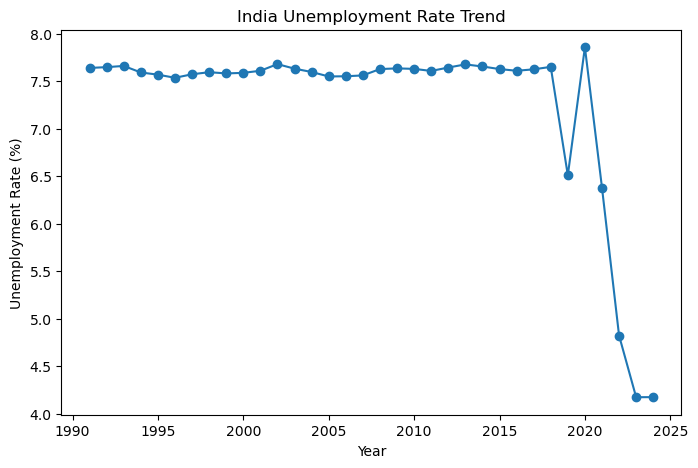

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(unemp["Year"], unemp["Unemployment_Rate"], marker="o")
plt.title("India Unemployment Rate Trend")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()


In [12]:
pre_covid = unemp[unemp["Year"] < 2020]["Unemployment_Rate"].mean()
post_covid = unemp[unemp["Year"] >= 2020]["Unemployment_Rate"].mean()

pre_covid, post_covid


(np.float64(7.575689655172413), np.float64(5.481199999999999))

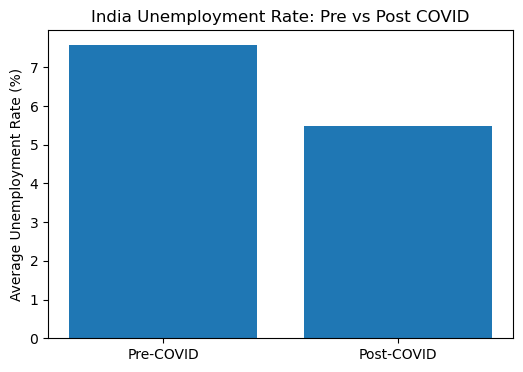

In [13]:
plt.figure(figsize=(6,4))
plt.bar(["Pre-COVID", "Post-COVID"], [pre_covid, post_covid])
plt.ylabel("Average Unemployment Rate (%)")
plt.title("India Unemployment Rate: Pre vs Post COVID")
plt.show()


In [14]:
pre_covid_mean = unemp[unemp["Year"] < 2020]["Unemployment_Rate"].mean()

covid_mean = unemp[
    (unemp["Year"] >= 2020) & (unemp["Year"] <= 2022)
]["Unemployment_Rate"].mean()

post_covid_mean = unemp[unemp["Year"] > 2022]["Unemployment_Rate"].mean()

pre_covid_mean, covid_mean, post_covid_mean


(np.float64(7.575689655172413),
 np.float64(6.353666666666666),
 np.float64(4.172499999999999))

In [15]:
phase_mean = pd.DataFrame({
    "Phase": ["Pre-COVID (<2020)", "COVID (2020–2022)", "Post-COVID (>2022)"],
    "Mean Unemployment Rate (%)": [
        pre_covid_mean,
        covid_mean,
        post_covid_mean
    ]
})

phase_mean


,Phase,Mean Unemployment Rate (%)
0,Pre-COVID (<2020),7.575690
1,COVID (2020–2022),6.353667
2,Post-COVID (>2022),4.172500


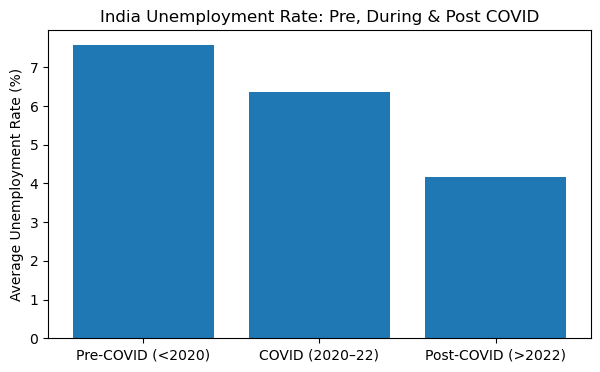

In [17]:
plt.figure(figsize=(7,4))
plt.bar(
    ["Pre-COVID (<2020)", "COVID (2020–22)", "Post-COVID (>2022)"],
    [pre_covid, covid, post_covid]
)
plt.ylabel("Average Unemployment Rate (%)")
plt.title("India Unemployment Rate: Pre, During & Post COVID")
plt.show()
